In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
import warnings
warnings.filterwarnings('ignore')

In [186]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HTuTdpWBJMXDdxKO0QRg0pcYo6wpTiSvYKkXbQtJvDOg',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'project-donotdelete-pr-ra20woi6fmmebm'
object_key = 'test.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [187]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [188]:
df.shape

(25976, 25)

'Checking the Distribution'

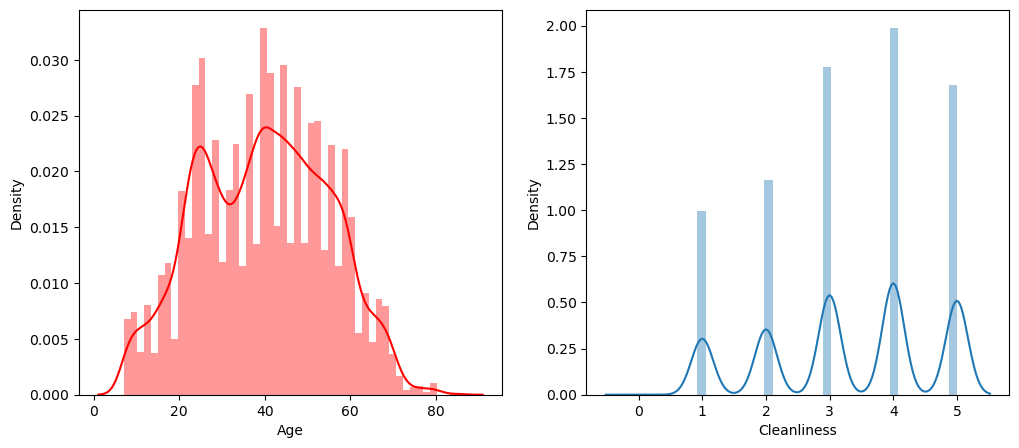

In [189]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df['Age'],color = 'r')
plt.subplot(122)
sns.distplot(df['Cleanliness'])
plt.show()

In [190]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

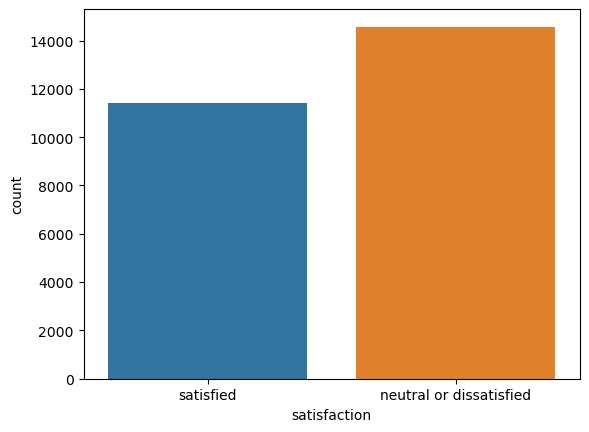

In [191]:
sns.countplot(df['satisfaction'])

# Data Preprocessing

# EDA

In [192]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [193]:
df = df.iloc[1:]

In [194]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [195]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [196]:
df['Arrival Delay in Minutes'].isnull().any()

True

In [197]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [198]:
df['Arrival Delay in Minutes'].isnull()

1        False
2        False
3        False
4        False
5        False
         ...  
25971    False
25972    False
25973    False
25974    False
25975    False
Name: Arrival Delay in Minutes, Length: 25975, dtype: bool

# Filling Null values

In [199]:
from sklearn.impute import SimpleImputer

In [200]:
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df['Arrival Delay in Minutes'] = pd.DataFrame(mode_imputer.fit_transform(df[['Arrival Delay in Minutes']]))

In [201]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             1
satisfaction                         0
dtype: int64

In [202]:
#df['Arrival Delay in Minutes'].dropna(how= 'any', inplace=True)

In [203]:
df.dropna(inplace=True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25974 entries, 1 to 25974
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25974 non-null  int64  
 1   Gender                             25974 non-null  object 
 2   Customer Type                      25974 non-null  object 
 3   Age                                25974 non-null  int64  
 4   Type of Travel                     25974 non-null  object 
 5   Class                              25974 non-null  object 
 6   Flight Distance                    25974 non-null  int64  
 7   Inflight wifi service              25974 non-null  int64  
 8   Departure/Arrival time convenient  25974 non-null  int64  
 9   Ease of Online booking             25974 non-null  int64  
 10  Gate location                      25974 non-null  int64  
 11  Food and drink                     25974 non-null  int

In [205]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

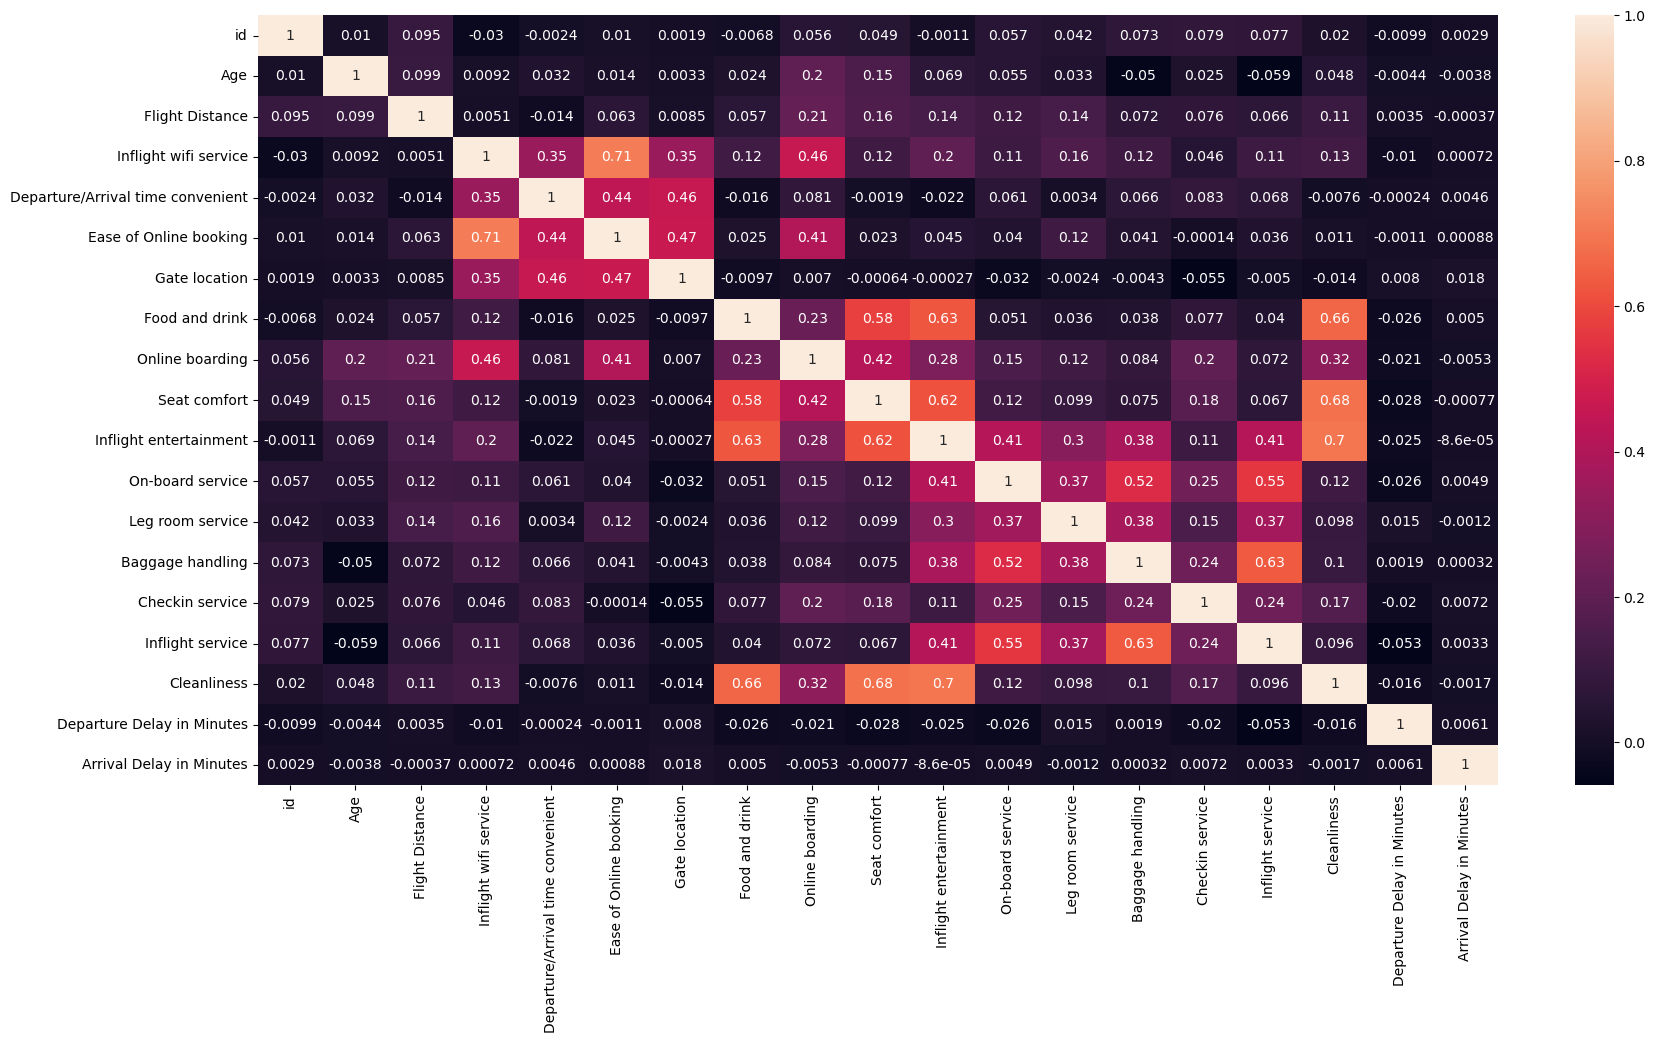

In [206]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()


# Converting Categorical Data to Numerical 

In [207]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [208]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [209]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [210]:
df['Class'].unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [211]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [212]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])
df['satisfaction'] = le.fit_transform(df['satisfaction'])

In [213]:
df['Gender'].unique()

array([0, 1])

In [214]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,6.0,0
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,20.0,1
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,0.0,1
5,39177,1,0,16,0,1,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1



# Checking Normal Distribution 

In [215]:
import warnings
warnings.filterwarnings('ignore')

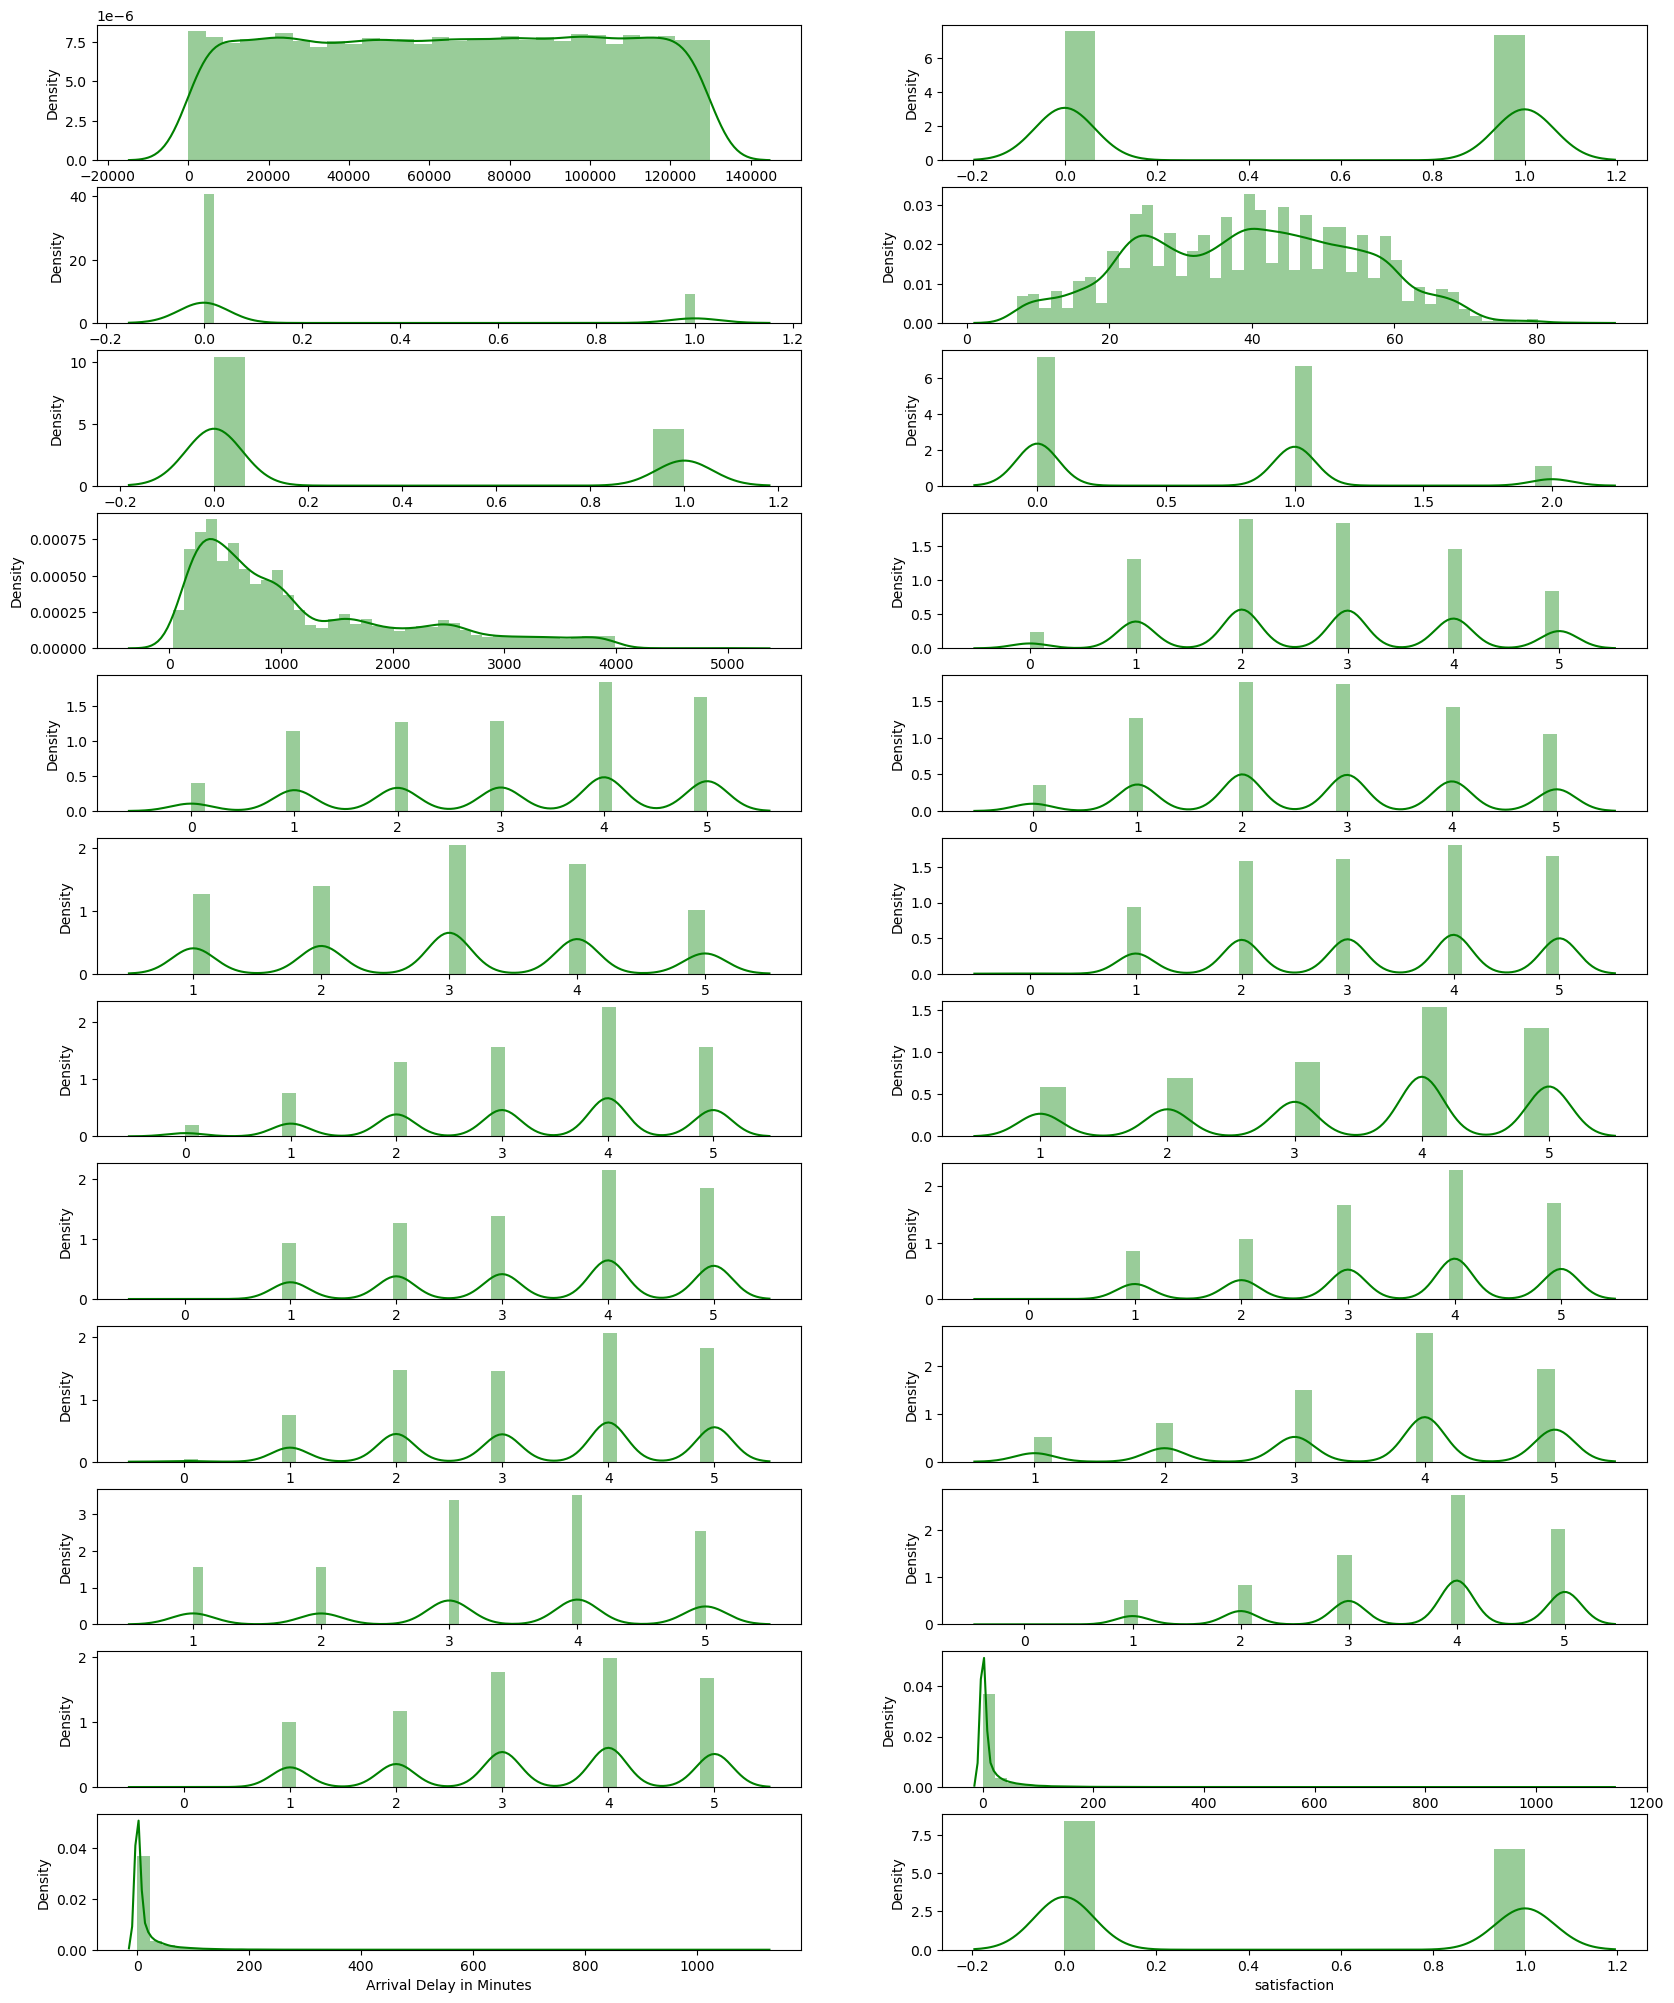

In [216]:
c = df.columns
fig, ax = plt.subplots(12,2,figsize=(20,25))
for i,subplot in zip(c,ax.flatten()):
    sns.distplot(df[i],ax= subplot,color = 'g')

## Checking Outliers in Data

In [217]:
df = df.drop(['id'],axis = 1)


In [218]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,6.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,20.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,0.0,1
5,1,0,16,0,1,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1


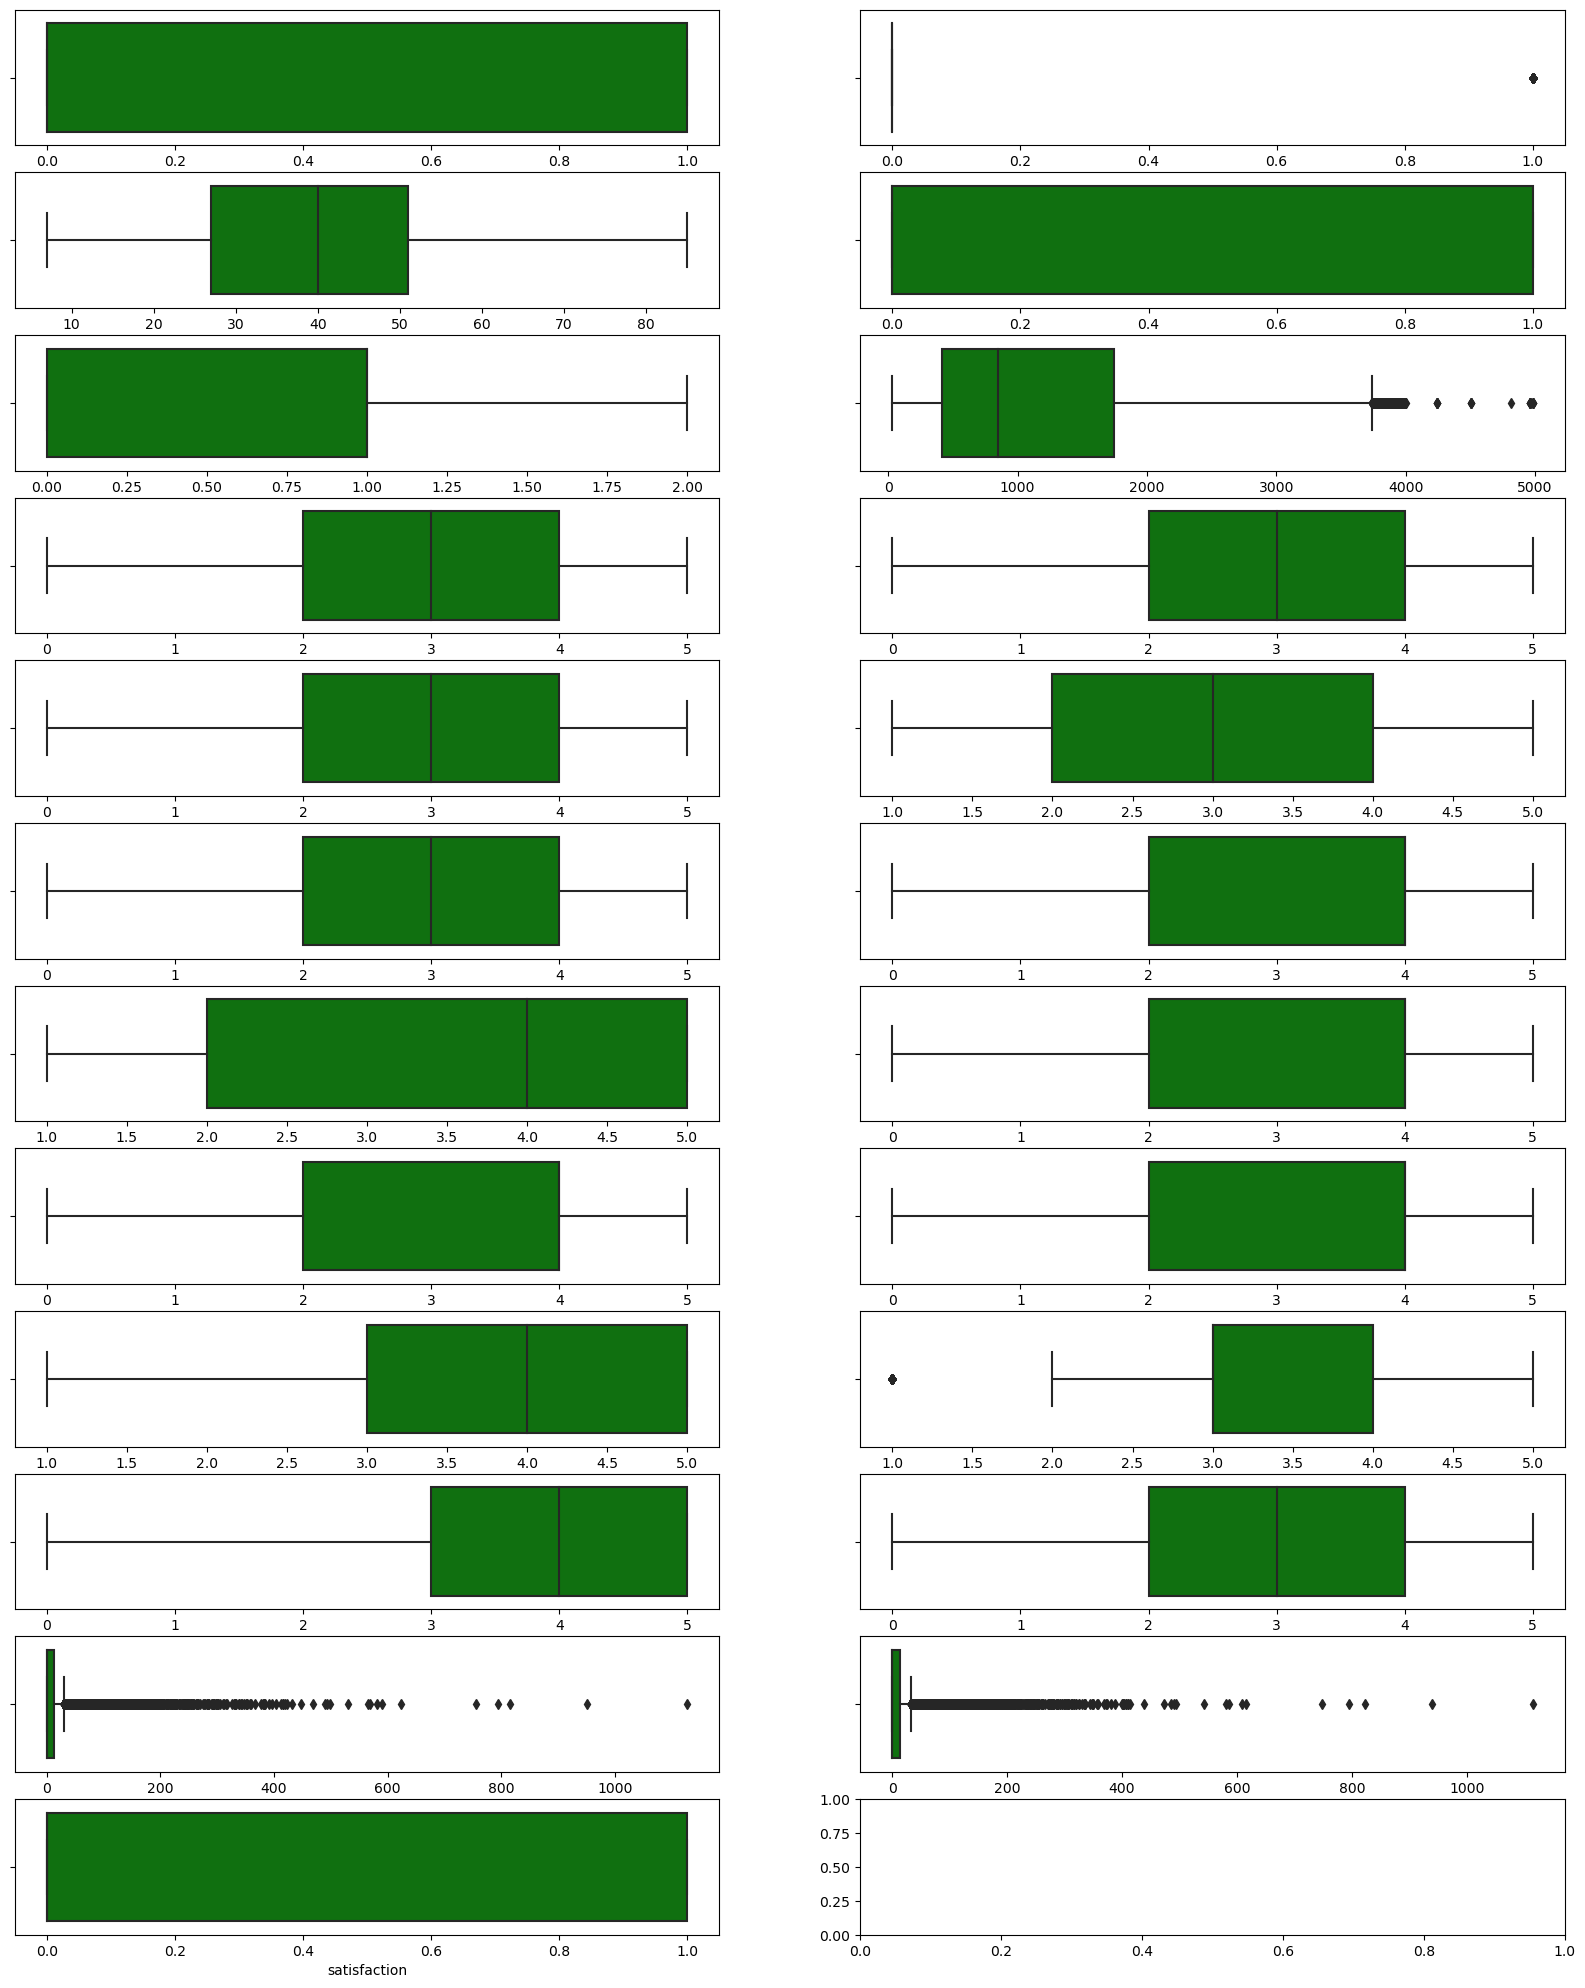

In [219]:
c = df.columns
fig, ax = plt.subplots(12,2,figsize=(20,25))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(df[i],ax= subplot,color = 'g')

In [220]:
quant = df.quantile(q = [0.25,0.75 ],axis =0)
quant

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0.25,0.0,0.0,27.0,0.0,0.0,414.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0
0.75,1.0,0.0,51.0,1.0,1.0,1744.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0,1.0


In [221]:
df['Customer Type'] = np.where(df['Customer Type']>0.1,0, df['Customer Type'])
df['Customer Type'] = np.where(df['Customer Type']<0,0,df['Customer Type'])


df['Flight Distance'] = np.where(df['Flight Distance']>3700,1744, df['Flight Distance'])
df['Flight Distance'] = np.where(df['Flight Distance']<0,414,df['Flight Distance'])

df['Checkin service'] = np.where(df['Checkin service']>4.9,4.0, df['Checkin service'])
df['Checkin service'] = np.where(df['Checkin service']<2,3.0,df['Checkin service'])


df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes']>10,12, df['Departure Delay in Minutes'])
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes']<0,3.0,df['Departure Delay in Minutes'])


df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']>10,13, df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']<0,3.0,df['Arrival Delay in Minutes'])

In [222]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

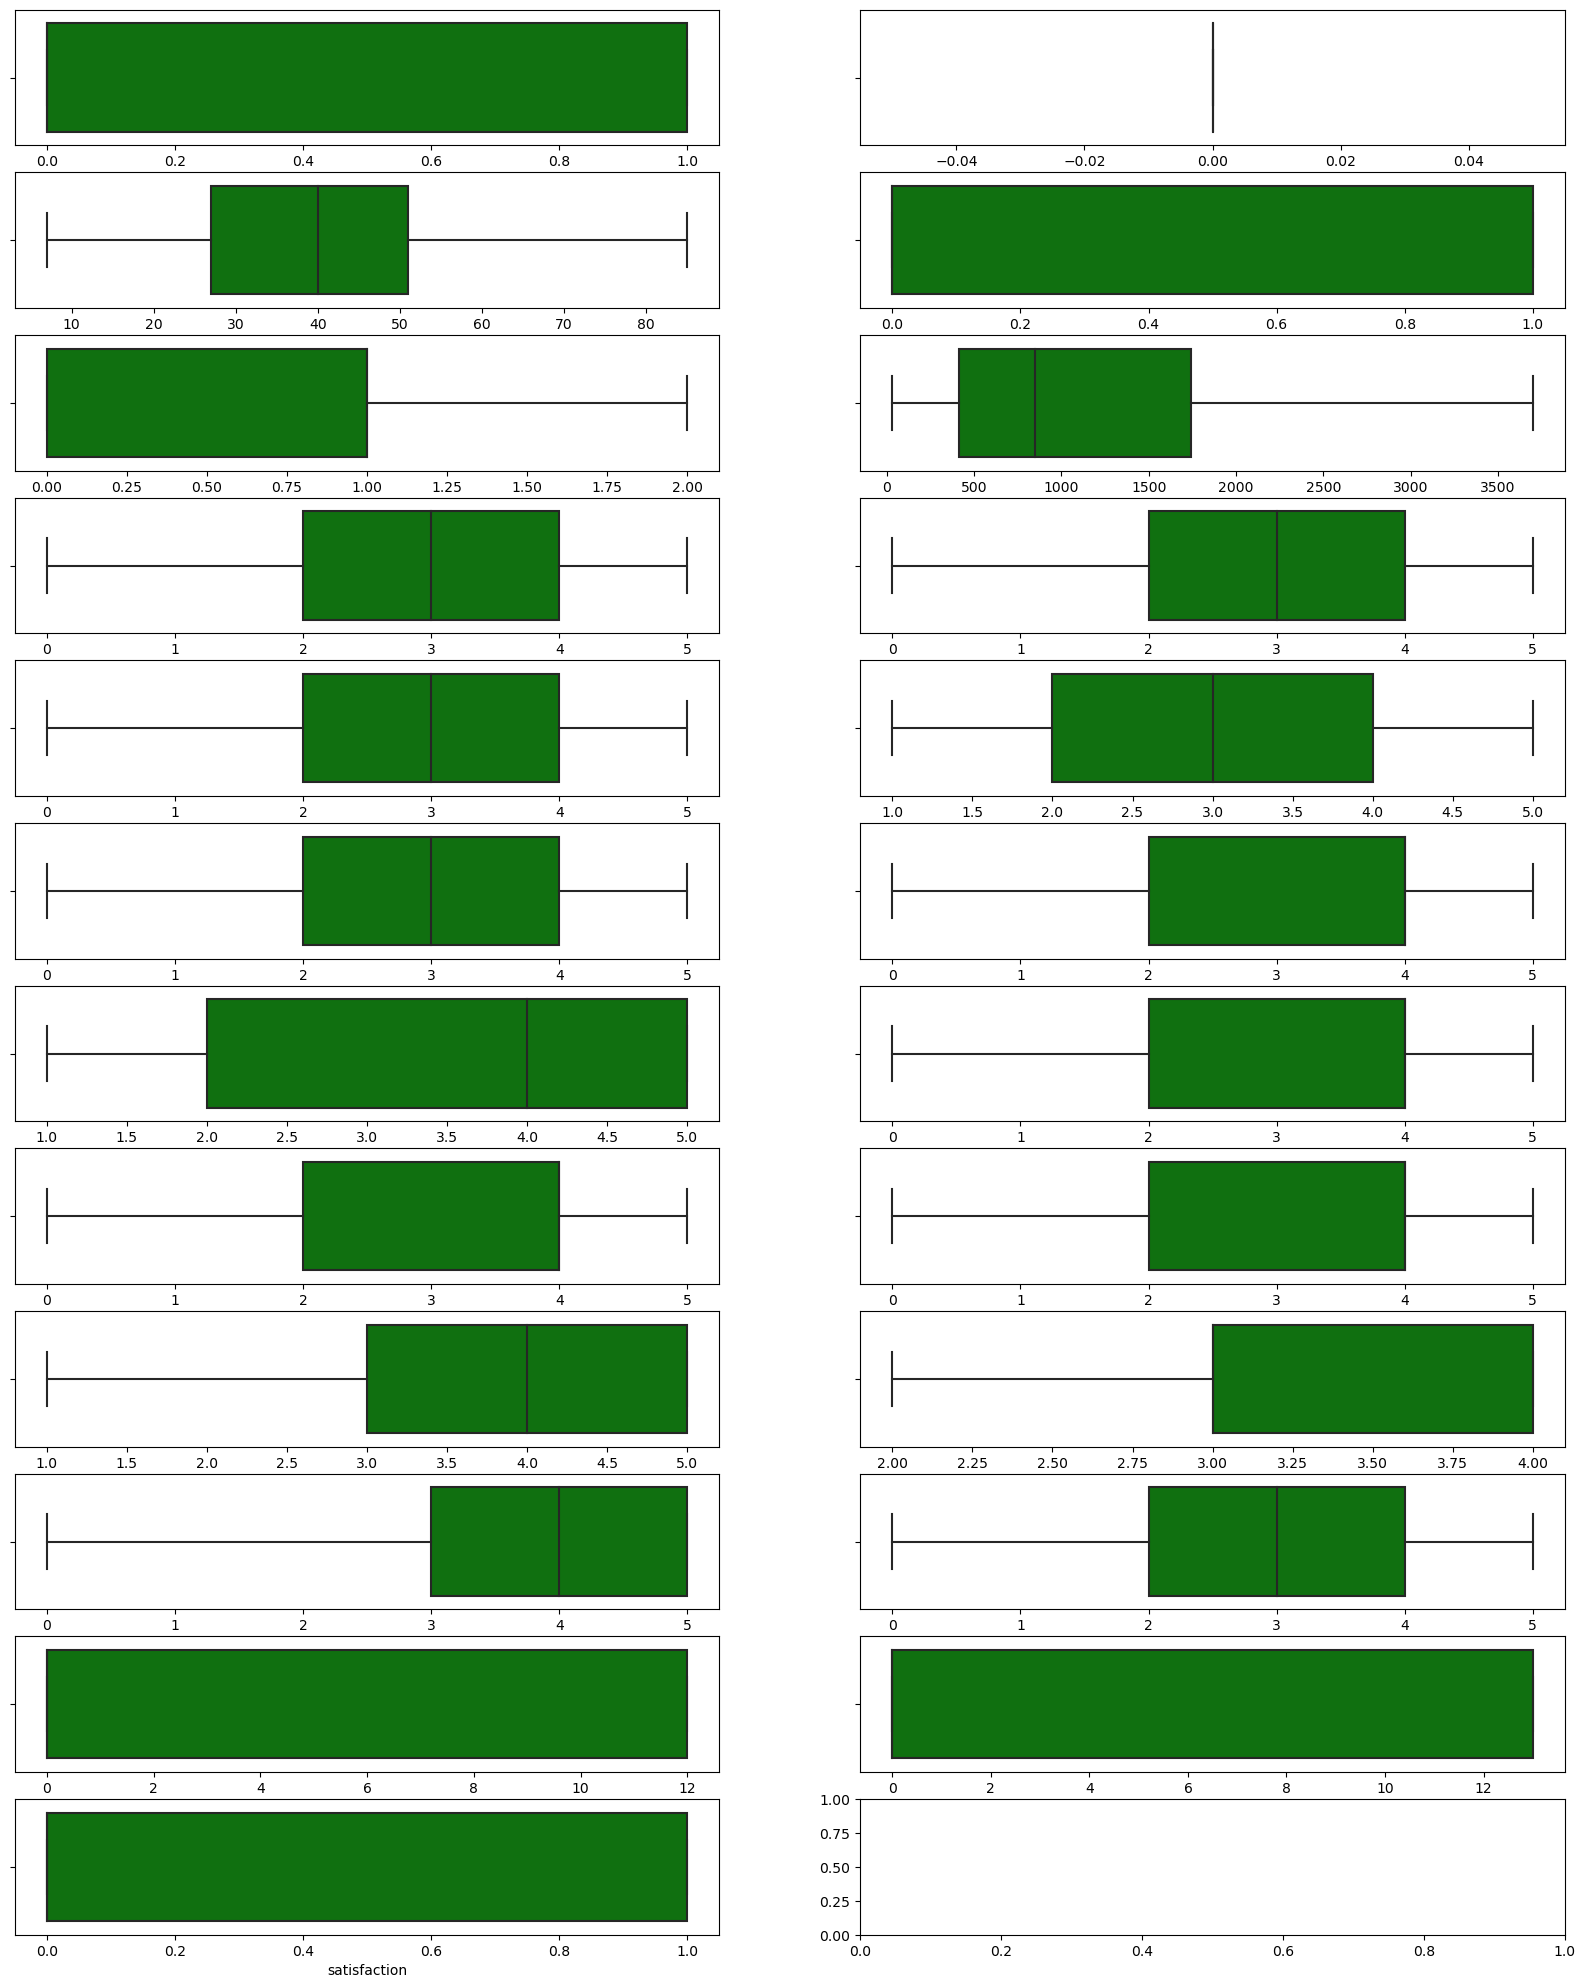

In [223]:
c = df.columns
fig, ax = plt.subplots(12,2,figsize=(20,25))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(df[i],ax= subplot,color = 'g')

## Scalling down the values so the we get proper features

In [224]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df)
data = pd.DataFrame(df1,columns=df.columns)

## After scalling down the values checking the distribution 

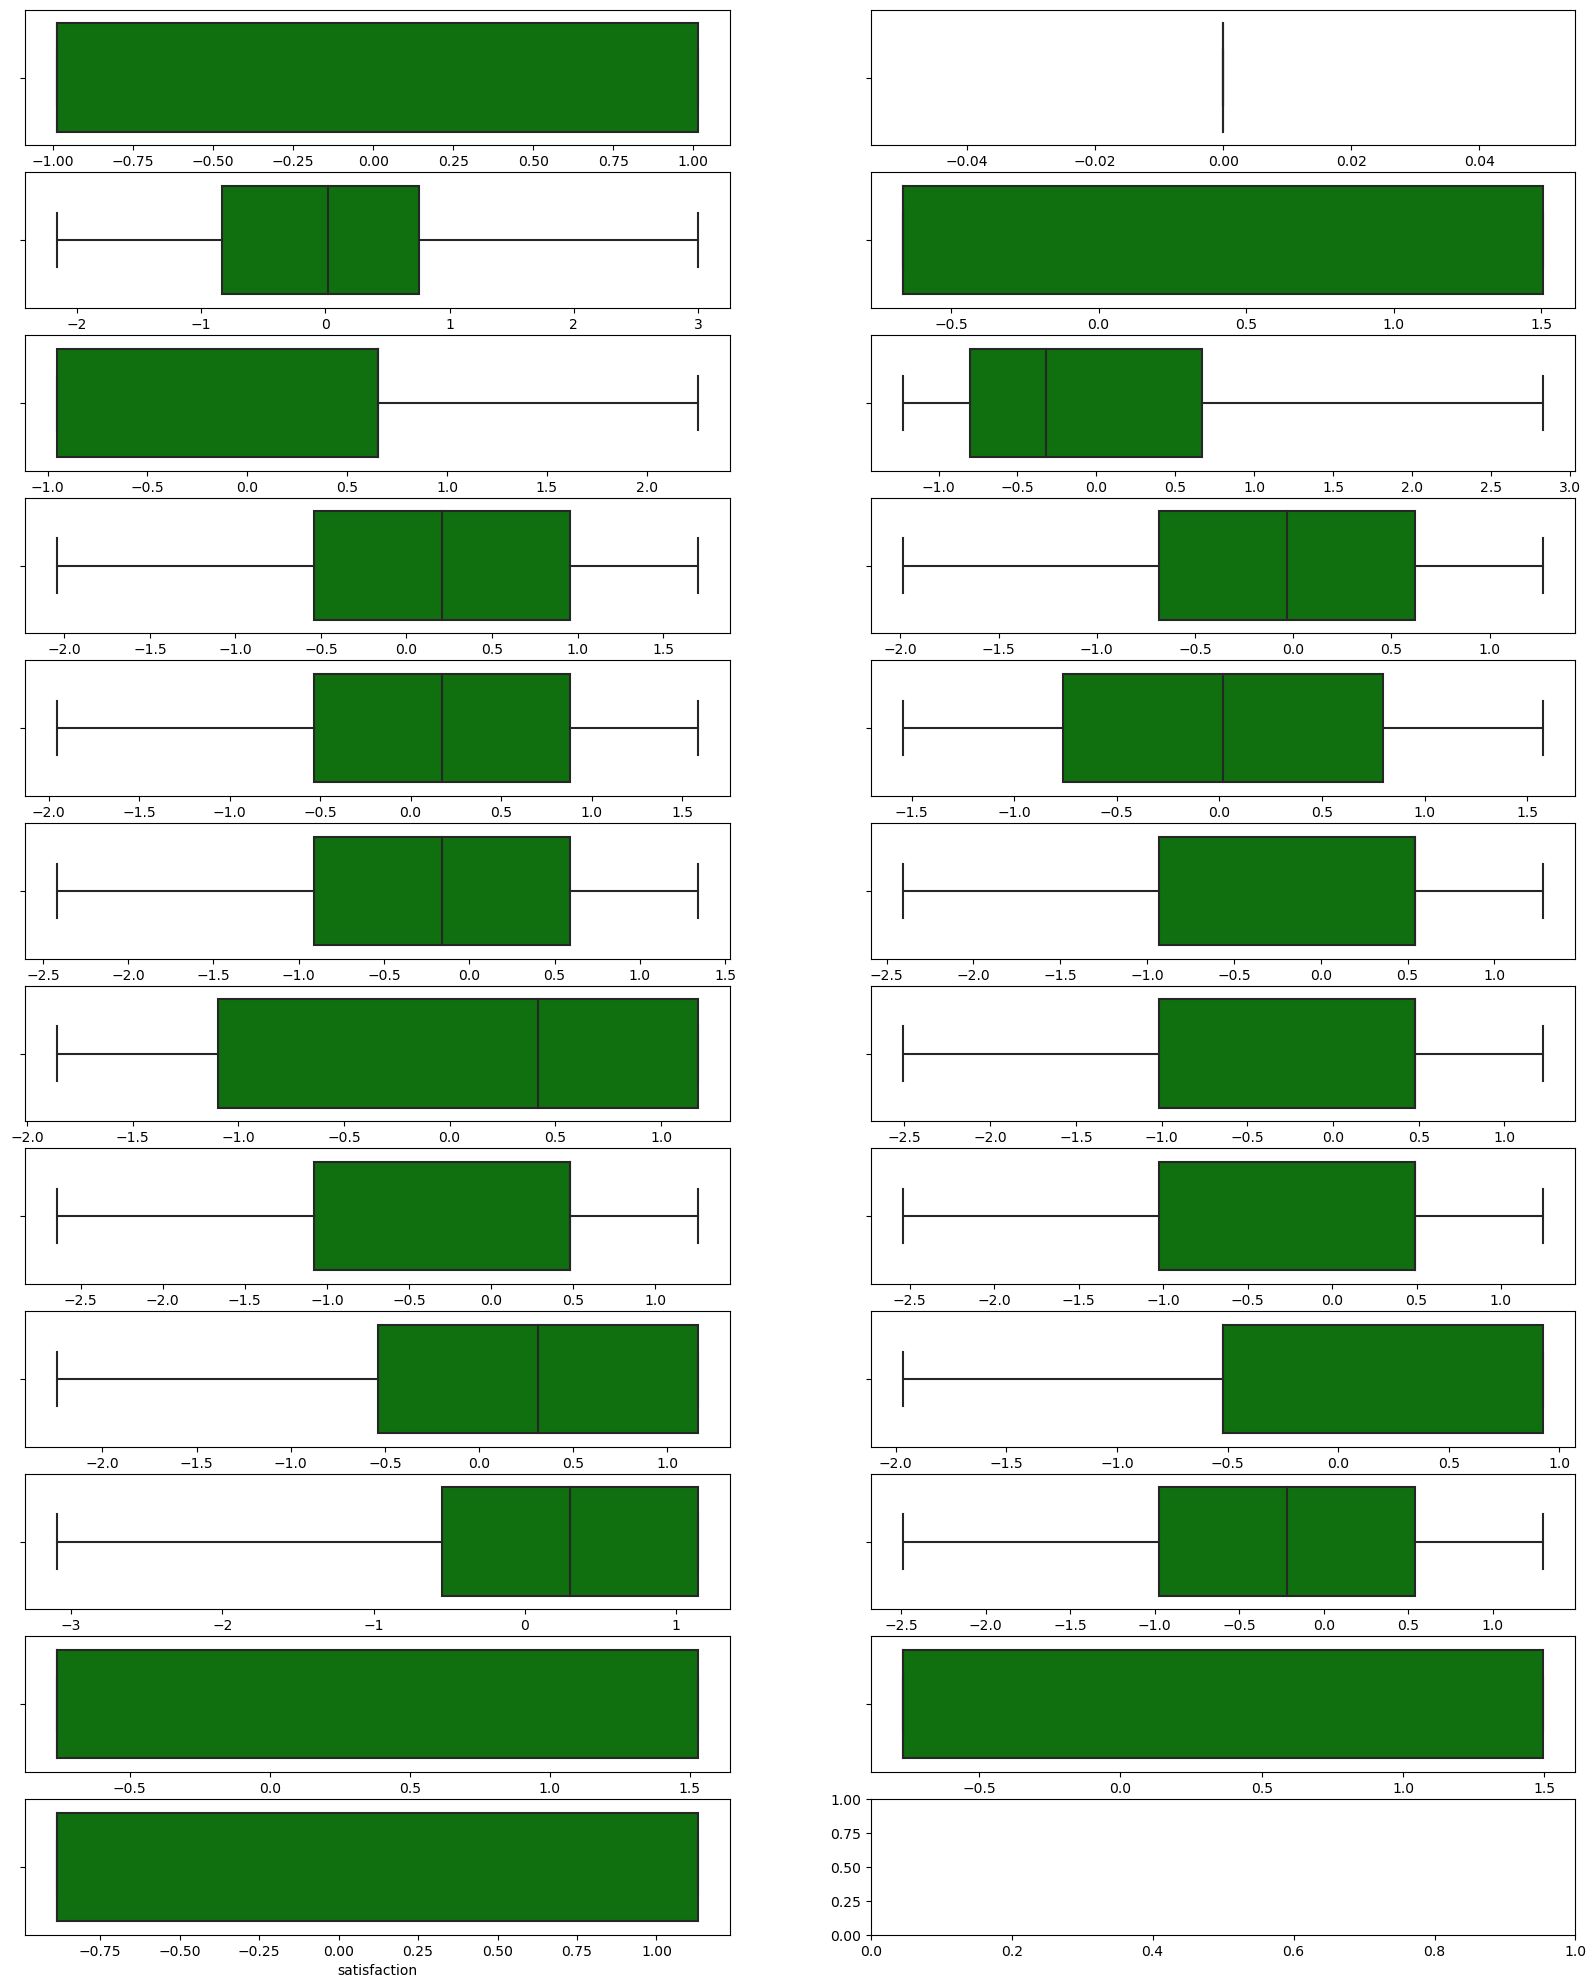

In [225]:
c = data.columns
fig, ax = plt.subplots(12,2,figsize=(20,25))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(data[i],ax= subplot,color = 'g')

### Feature Selection

In [226]:
from sklearn.feature_selection import VarianceThreshold

In [227]:
var = VarianceThreshold(0.0)
var.fit(data)

VarianceThreshold()

In [228]:
var.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [229]:
for i in data.columns:
    a = data[i].var()
    print(a)

1.0000385015208262
0.0
1.0000385015208366
1.000038501521086
1.0000385015208202
1.0000385015208164
1.0000385015206963
1.0000385015210098
1.0000385015207653
1.0000385015205469
1.0000385015207478
1.0000385015206337
1.0000385015209197
1.000038501520859
1.0000385015208995
1.0000385015209106
1.0000385015208022
1.0000385015207953
1.000038501520806
1.0000385015206121
1.0000385015208297
1.0000385015207274
1.0000385015209774


In [230]:
a = data.columns[var.get_support()]
a

Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [231]:
len(data.columns)

23

In [232]:
constant = data.columns[~var.get_support()]
print(len(constant))
print(constant)

1
Index(['Customer Type'], dtype='object')


In [233]:
data['Customer Type'].unique()

array([0.])

In [234]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.986007,0.0,-0.239194,-0.663355,-0.950365,1.906849,-1.291583,-1.334798,0.172123,-1.542007,...,0.479910,0.479183,0.492745,0.311724,-0.520190,0.297060,1.299049,-0.758218,-0.770051,1.130496
1,1.014192,0.0,-1.296292,-0.663355,0.652959,-1.047921,-0.542703,-1.986969,-0.535606,0.797940,...,-1.014627,0.479183,-1.782014,-0.538325,-1.967739,-1.397052,-0.974994,-0.758218,0.276106,-0.884567
2,1.014192,0.0,0.289355,-0.663355,-0.950365,2.475457,-2.040463,-1.986969,-1.951064,-0.762025,...,-1.761896,-1.860932,-1.782014,-2.238422,-0.520190,-2.244108,0.541034,-0.758218,1.496623,1.130496
3,-0.986007,0.0,0.619698,-0.663355,0.652959,0.047258,-0.542703,-0.030457,0.879852,0.017958,...,-1.014627,-1.080894,-1.023761,-1.388373,0.927359,-1.397052,0.541034,-0.758218,-0.770051,1.130496
4,1.014192,0.0,-1.560567,-0.663355,0.652959,-0.916278,0.206177,-0.030457,0.172123,0.017958,...,1.227179,0.479183,-0.265508,-2.238422,-0.520190,-1.397052,1.299049,-0.758218,-0.770051,1.130496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,-0.986007,0.0,-0.239194,-0.663355,0.652959,-0.782423,-1.291583,1.273885,-1.243335,0.017958,...,0.479910,1.259221,-1.023761,1.161772,-1.967739,-0.549996,0.541034,-0.758218,-0.770051,-0.884567
25970,1.014192,0.0,-0.371331,-0.663355,-0.950365,-0.678436,0.206177,-0.030457,0.172123,-1.542007,...,0.479910,-0.300856,-1.023761,0.311724,0.927359,1.144116,0.541034,-0.758218,-0.770051,-0.884567
25971,1.014192,0.0,-1.098086,-0.663355,-0.950365,-0.545688,0.955057,0.621714,0.879852,0.797940,...,0.479910,0.479183,1.250997,1.161772,0.927359,1.144116,0.541034,-0.758218,-0.770051,1.130496
25972,-0.986007,0.0,-1.494498,1.507488,0.652959,-0.344352,-0.542703,1.273885,-1.243335,1.577922,...,-1.014627,0.479183,-0.265508,0.311724,0.927359,0.297060,-0.974994,-0.758218,-0.770051,-0.884567


In [235]:
data = var.transform(data)

data = pd.DataFrame(data,columns=a)

In [236]:
data

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.986007,-0.239194,-0.663355,-0.950365,1.906849,-1.291583,-1.334798,0.172123,-1.542007,1.340322,...,0.479910,0.479183,0.492745,0.311724,-0.520190,0.297060,1.299049,-0.758218,-0.770051,1.130496
1,1.014192,-1.296292,-0.663355,0.652959,-1.047921,-0.542703,-1.986969,-0.535606,0.797940,-0.912738,...,-1.014627,0.479183,-1.782014,-0.538325,-1.967739,-1.397052,-0.974994,-0.758218,0.276106,-0.884567
2,1.014192,0.289355,-0.663355,-0.950365,2.475457,-2.040463,-1.986969,-1.951064,-0.762025,-0.161718,...,-1.761896,-1.860932,-1.782014,-2.238422,-0.520190,-2.244108,0.541034,-0.758218,1.496623,1.130496
3,-0.986007,0.619698,-0.663355,0.652959,0.047258,-0.542703,-0.030457,0.879852,0.017958,0.589302,...,-1.014627,-1.080894,-1.023761,-1.388373,0.927359,-1.397052,0.541034,-0.758218,-0.770051,1.130496
4,1.014192,-1.560567,-0.663355,0.652959,-0.916278,0.206177,-0.030457,0.172123,0.017958,1.340322,...,1.227179,0.479183,-0.265508,-2.238422,-0.520190,-1.397052,1.299049,-0.758218,-0.770051,1.130496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,-0.986007,-0.239194,-0.663355,0.652959,-0.782423,-1.291583,1.273885,-1.243335,0.017958,0.589302,...,0.479910,1.259221,-1.023761,1.161772,-1.967739,-0.549996,0.541034,-0.758218,-0.770051,-0.884567
25970,1.014192,-0.371331,-0.663355,-0.950365,-0.678436,0.206177,-0.030457,0.172123,-1.542007,0.589302,...,0.479910,-0.300856,-1.023761,0.311724,0.927359,1.144116,0.541034,-0.758218,-0.770051,-0.884567
25971,1.014192,-1.098086,-0.663355,-0.950365,-0.545688,0.955057,0.621714,0.879852,0.797940,0.589302,...,0.479910,0.479183,1.250997,1.161772,0.927359,1.144116,0.541034,-0.758218,-0.770051,1.130496
25972,-0.986007,-1.494498,1.507488,0.652959,-0.344352,-0.542703,1.273885,-1.243335,1.577922,-0.912738,...,-1.014627,0.479183,-0.265508,0.311724,0.927359,0.297060,-0.974994,-0.758218,-0.770051,-0.884567


## Now using coreletion we find the best features in the data set

In [237]:
data.shape

(25974, 22)

In [238]:
(data.iloc[:,:-1].shape)

(25974, 21)

### there are no corelated features in the dataset

# Splitting the data

In [239]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [240]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train,y_test = train_test_split(X,df['satisfaction'],test_size=0.2,random_state=42)

In [241]:
X_train.shape , y_train.shape

((20779, 21), (20779,))

In [242]:
X_test.shape , y_test.shape

((5195, 21), (5195,))

# Model Development

In [243]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [244]:
# KNN 

def knn(X_train , y_train ,X_test  , y_test):
    reg = KNeighborsClassifier(n_neighbors=5)
    reg.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg.score(X_train ,y_train))
    print('Test accuracy = ',reg.score(X_test , y_test))
    y_test_pred = reg.predict(X_test)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))
    
    
    
    

In [245]:
#logistic Regression
def lg(X_train,y_train,X_test,y_test):
    reg1 = LogisticRegression()
    reg1.fit(X_train,y_train)
    print('accuracy')
    print('Training accuracy= ', reg1.score(X_train,y_train))
    print('test accuracy= ', reg1.score(X_test,y_test))
    y_test_pred = reg1.predict(X_test)
    print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
    print('test data classification report:', classification_report(y_test,y_test_pred))

In [246]:
#Naive bayes
def dt(X_train,y_train,X_test,y_test):
    reg2 = GaussianNB()
    reg2.fit(X_train,y_train)
    print('accuracy')
    print('Training accuracy= ', reg2.score(X_train,y_train))
    print('test accuracy= ', reg2.score(X_test,y_test))
    y_test_pred = reg2.predict(X_test)
    print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
    print('test data classification report:', classification_report(y_test,y_test_pred))

In [247]:
#Decission Tree
def dt(X_train,y_train,X_test,y_test):
    reg3 = DecisionTreeClassifier(criterion='entropy')
    reg3.fit(X_train,y_train)
    print('accuracy')
    print('Training accuracy= ', reg3.score(X_train,y_train))
    print('test accuracy= ', reg3.score(X_test,y_test))
    y_test_pred = reg3.predict(X_test)
    print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
    print('test data classification report:', classification_report(y_test,y_test_pred))

In [248]:
# Random Forest 
def RF(X_train , y_train ,X_test , y_test):
    reg4 = RandomForestClassifier()
    reg4.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg4.score(X_train,y_train))
    print('Test accuracy = ',reg4.score(X_test,y_test))
    y_test_pred = reg4.predict(X_test)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))
    

In [249]:
def info(X_train , y_train , X_test , y_test):
    print('------------*------Logistic Regression-----*-----------')
    lg(X_train , y_train,X_test , y_test)

    
    print('------------*------Random Forest-----*-----------')
    RF(X_train , y_train,X_test , y_test)
    

In [250]:
X_train.shape , y_train.shape

((20779, 21), (20779,))

In [251]:
X_test.shape , y_test.shape

((5195, 21), (5195,))

In [252]:
data.shape

(25974, 22)

In [253]:
y_train

18485    0
12827    0
3512     0
14762    1
434      1
        ..
21576    0
5391     1
861      1
15796    0
23655    0
Name: satisfaction, Length: 20779, dtype: int64

In [254]:
df['satisfaction']

1        1
2        0
3        1
4        1
5        1
        ..
25970    0
25971    0
25972    1
25973    0
25974    1
Name: satisfaction, Length: 25974, dtype: int64

In [255]:
info(X_train,y_train,X_test,y_test)

------------*------Logistic Regression-----*-----------
accuracy
Training accuracy=  0.8548534578179893
test accuracy=  0.8589027911453321
Test data confusion matrix:  [[2547  357]
 [ 376 1915]]
test data classification report:               precision    recall  f1-score   support

           0       0.87      0.88      0.87      2904
           1       0.84      0.84      0.84      2291

    accuracy                           0.86      5195
   macro avg       0.86      0.86      0.86      5195
weighted avg       0.86      0.86      0.86      5195

------------*------Random Forest-----*-----------
Accuracy:
Training accuracy =  1.0
Test accuracy =  0.9455245428296439
Test data confusion_matrix :  [[2787  117]
 [ 166 2125]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.94      0.96      0.95      2904
           1       0.95      0.93      0.94      2291

    accuracy                           0.95      5195
   macro avg  

# Hyperparametric Tunning

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [258]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [259]:
grid_search = GridSearchCV(estimator = forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.9491314886957989
best_parameters =  {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 200}


In [265]:
random = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[2785,  119],
       [ 160, 2131]])

In [266]:
acc = accuracy_score(y_test,y_pred)
acc

0.9462945139557266

In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2904
           1       0.95      0.93      0.94      2291

    accuracy                           0.95      5195
   macro avg       0.95      0.94      0.95      5195
weighted avg       0.95      0.95      0.95      5195



In [268]:
X_train.shape

(20779, 21)

In [269]:
!pip install ibm_watson_machine_learning

In [290]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "EBzgaFUmCs9XHX5l1aVYKBp9QuJWAEvsOo56KVTgWMFE"
}
client = APIClient(wml_credentials)

In [291]:
def guid_from_space_name(client,space_name):
    space = clint.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item["entity"]["name"]==space_name)["metadata"]["id"])


In [292]:
space_uid = guid_from_space_name(client,"models")
print("Space UID = " + space_uid)

Space UID = 8ae4ea35-7e48-4423-a621-6d0b4d637fb4


In [295]:
client.set.default_space(space_uid)

'SUCCESS'

In [296]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [308]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")
software_spec_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [309]:
model_details = client.repository.store_model(model = random , meta_props = {
client.repository.ModelMetaNames.NAME: "Churn_modeling",
client.repository.ModelMetaNames.TYPE: "scikit-learn_1.1",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid } 
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [310]:
model_id

'17dbe1a7-f7cd-4ea7-9f2e-628bc349c8fc'

In [317]:
deployment_props = {client.deployments.ConfigurationMetaNames.NAME:"Airline",
                    client.deployments.ConfigurationMetaNames.ONLINE:{}}

In [318]:
details = client.deployments.create(artifact_uid=model_id,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '17dbe1a7-f7cd-4ea7-9f2e-628bc349c8fc' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='379b119c-6b51-48ab-bc09-4935fdcd25bf'
------------------------------------------------------------------------------------------------




In [175]:
Airline.predict([[1,2,1,3,1,0,7,5,0,1,1,1,1,1,1,1,1,1,1,1,1]])

array([0])

In [176]:
X_train.columns

Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [177]:
df["Age"].unique()

array([36, 20, 44, 49, 16, 77, 43, 47, 46, 33, 60, 52, 50, 31, 55, 25, 30,
       62, 24, 22, 51, 56, 41, 53, 12, 39, 32, 40, 42, 28, 59, 58, 27, 67,
       70, 66, 19, 69, 35, 54, 26, 61, 21, 37, 45, 38,  7, 34, 17, 15, 48,
       13, 11, 29,  8, 18, 23, 65, 57, 80, 64,  9, 14, 68, 10, 79, 63, 73,
       74, 71, 72, 76, 78, 75, 85])

In [178]:
X_train.columns

Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')